# Introduction

Notebook to analyze the **True Positive** Results for each model in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner.tc_br_models_runner import TC_BR_Runner
from modules.utils import model_evaluator as m_eval
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [2]:
models_runner_4 = TC_BR_Runner()

lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df()

evaluator_4 = m_eval.ModelEvaluator(oracle)
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4],
                                       top_values=[1,3,5,10], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleVolunteers.shape: (195, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,30.77,1.93,3.57,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
1,lsi,top_1_cosine_0.1,30.77,1.93,3.57,precision recall fscore ...,0.1,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
2,lsi,top_1_cosine_0.2,30.77,1.93,3.57,precision recall fscore ...,0.2,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
3,lsi,top_1_cosine_0.3,30.77,1.93,3.57,precision recall fscore ...,0.3,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
4,lsi,top_1_cosine_0.4,28.57,1.86,3.44,precision recall fscore ...,0.4,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...


### Grouping Results by Model

#### Min Precision

model
bm25          14.29
lda           10.11
lsi            0.00
wordvector     4.73
Name: perc_precision, dtype: float64



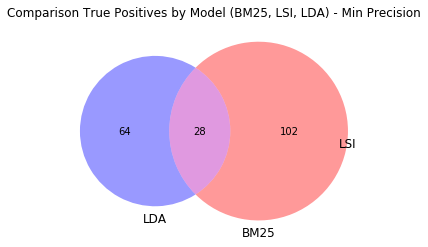

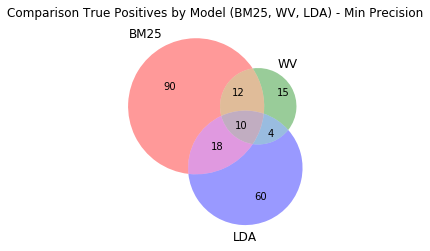

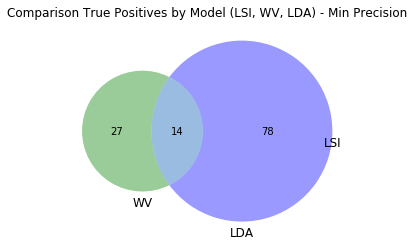

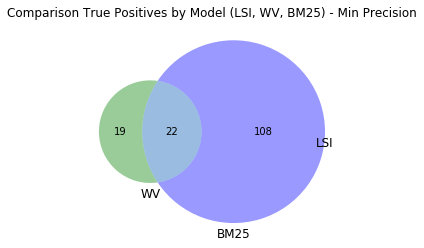

In [4]:
group = evals_df_4.groupby('model').perc_precision.min()
print(group)
print()

bm25_min_prec = group[group.index == 'bm25'].values[0]
lsi_min_prec = group[group.index == 'lsi'].values[0]
lda_min_prec = group[group.index == 'lda'].values[0]
wv_min_prec = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_min_prec))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_min_prec))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_min_prec))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_min_prec))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Min Precision')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [5]:
print("BM25 Exclusive TP:")
display(bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLSI Exclusive TP:")
display(lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLDA Exclusive TP:")
display(lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set)

print("\n\nWV Exclusive TP:")
display(wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set)

BM25 Exclusive TP:


{('TC_104_TRG', 'BR_1300738_SRC'),
 ('TC_106_TRG', 'BR_1300738_SRC'),
 ('TC_108_TRG', 'BR_1300738_SRC'),
 ('TC_13_TRG', 'BR_1352539_SRC'),
 ('TC_145_TRG', 'BR_1365887_SRC'),
 ('TC_149_TRG', 'BR_1365887_SRC'),
 ('TC_14_TRG', 'BR_1297374_SRC'),
 ('TC_14_TRG', 'BR_1328913_SRC'),
 ('TC_14_TRG', 'BR_1335992_SRC'),
 ('TC_14_TRG', 'BR_1337682_SRC'),
 ('TC_14_TRG', 'BR_1352539_SRC'),
 ('TC_154_TRG', 'BR_1292566_SRC'),
 ('TC_154_TRG', 'BR_1292573_SRC'),
 ('TC_155_TRG', 'BR_1287384_SRC'),
 ('TC_155_TRG', 'BR_1292573_SRC'),
 ('TC_156_TRG', 'BR_1287384_SRC'),
 ('TC_157_TRG', 'BR_1432915_SRC'),
 ('TC_158_TRG', 'BR_1287384_SRC'),
 ('TC_159_TRG', 'BR_1297686_SRC'),
 ('TC_159_TRG', 'BR_1432915_SRC'),
 ('TC_15_TRG', 'BR_1294887_SRC'),
 ('TC_15_TRG', 'BR_1335992_SRC'),
 ('TC_15_TRG', 'BR_1352539_SRC'),
 ('TC_160_TRG', 'BR_1297686_SRC'),
 ('TC_160_TRG', 'BR_1432915_SRC'),
 ('TC_161_TRG', 'BR_1292573_SRC'),
 ('TC_161_TRG', 'BR_1432915_SRC'),
 ('TC_162_TRG', 'BR_1292566_SRC'),
 ('TC_163_TRG', 'BR_1287384_S



LSI Exclusive TP:


set()



LDA Exclusive TP:


{('TC_147_TRG', 'BR_1316126_SRC'),
 ('TC_14_TRG', 'BR_1278388_SRC'),
 ('TC_14_TRG', 'BR_1291770_SRC'),
 ('TC_14_TRG', 'BR_1297336_SRC'),
 ('TC_14_TRG', 'BR_1305737_SRC'),
 ('TC_14_TRG', 'BR_1365887_SRC'),
 ('TC_151_TRG', 'BR_1316126_SRC'),
 ('TC_152_TRG', 'BR_1316126_SRC'),
 ('TC_156_TRG', 'BR_1287748_SRC'),
 ('TC_159_TRG', 'BR_1287748_SRC'),
 ('TC_159_TRG', 'BR_1292573_SRC'),
 ('TC_159_TRG', 'BR_1357458_SRC'),
 ('TC_164_TRG', 'BR_1287748_SRC'),
 ('TC_169_TRG', 'BR_1287748_SRC'),
 ('TC_16_TRG', 'BR_1278388_SRC'),
 ('TC_16_TRG', 'BR_1297336_SRC'),
 ('TC_16_TRG', 'BR_1305737_SRC'),
 ('TC_16_TRG', 'BR_1334844_SRC'),
 ('TC_17_TRG', 'BR_1294733_SRC'),
 ('TC_17_TRG', 'BR_1297336_SRC'),
 ('TC_17_TRG', 'BR_1334844_SRC'),
 ('TC_187_TRG', 'BR_1335538_SRC'),
 ('TC_188_TRG', 'BR_1335538_SRC'),
 ('TC_19_TRG', 'BR_1278388_SRC'),
 ('TC_19_TRG', 'BR_1451475_SRC'),
 ('TC_201_TRG', 'BR_1305195_SRC'),
 ('TC_202_TRG', 'BR_1305195_SRC'),
 ('TC_203_TRG', 'BR_1305195_SRC'),
 ('TC_204_TRG', 'BR_1365887_SRC'),



WV Exclusive TP:


{('TC_130_TRG', 'BR_1314643_SRC'),
 ('TC_131_TRG', 'BR_1314643_SRC'),
 ('TC_135_TRG', 'BR_1314643_SRC'),
 ('TC_14_TRG', 'BR_1279864_SRC'),
 ('TC_180_TRG', 'BR_1290424_SRC'),
 ('TC_188_TRG', 'BR_1290424_SRC'),
 ('TC_79_TRG', 'BR_1306639_SRC'),
 ('TC_80_TRG', 'BR_1306639_SRC'),
 ('TC_82_TRG', 'BR_1248267_SRC'),
 ('TC_83_TRG', 'BR_1248267_SRC'),
 ('TC_89_TRG', 'BR_1248267_SRC'),
 ('TC_90_TRG', 'BR_1248267_SRC'),
 ('TC_93_TRG', 'BR_1299458_SRC'),
 ('TC_94_TRG', 'BR_1299458_SRC'),
 ('TC_94_TRG', 'BR_1365887_SRC')}

In [6]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 0
LDA TP Amount: 92
BM25 TP Amount: 130
WV TP Amount: 41


#### Min Recall

model
bm25          1.54
lda           0.56
lsi           0.00
wordvector    0.38
Name: perc_recall, dtype: float64



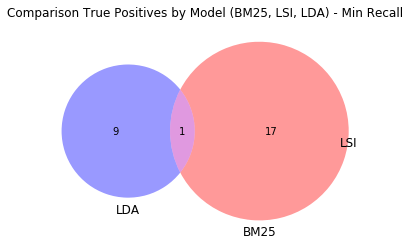

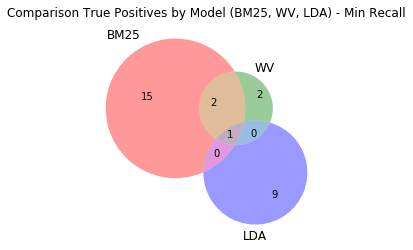

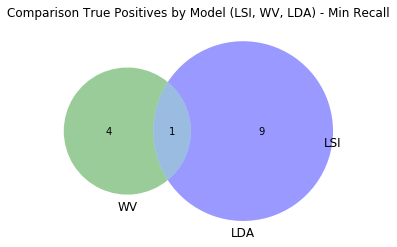

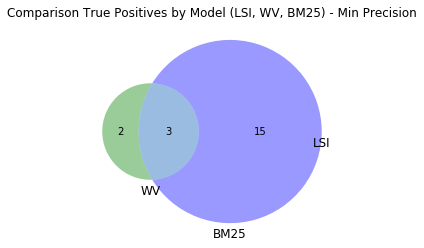

In [7]:
group = evals_df_4.groupby('model').perc_recall.min()
print(group)
print()

bm25_min_recall = group[group.index == 'bm25'].values[0]
lsi_min_recall = group[group.index == 'lsi'].values[0]
lda_min_recall = group[group.index == 'lda'].values[0]
wv_min_recall = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_min_recall))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_min_recall))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_min_recall))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_min_recall))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Min Recall')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [8]:
print("BM25 Exclusive TP:")
display(bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLSI Exclusive TP:")
display(lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLDA Exclusive TP:")
display(lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set)

print("\n\nWV Exclusive TP:")
display(wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set)

BM25 Exclusive TP:


{('TC_14_TRG', 'BR_1334844_SRC'),
 ('TC_159_TRG', 'BR_1432915_SRC'),
 ('TC_161_TRG', 'BR_1292566_SRC'),
 ('TC_163_TRG', 'BR_1292573_SRC'),
 ('TC_179_TRG', 'BR_1316126_SRC'),
 ('TC_17_TRG', 'BR_1408361_SRC'),
 ('TC_193_TRG', 'BR_1296861_SRC'),
 ('TC_193_TRG', 'BR_1345687_SRC'),
 ('TC_19_TRG', 'BR_1291770_SRC'),
 ('TC_206_TRG', 'BR_1305195_SRC'),
 ('TC_59_TRG', 'BR_1318903_SRC'),
 ('TC_59_TRG', 'BR_1344446_SRC'),
 ('TC_63_TRG', 'BR_1248268_SRC'),
 ('TC_75_TRG', 'BR_1248267_SRC'),
 ('TC_88_TRG', 'BR_1289240_SRC')}



LSI Exclusive TP:


set()



LDA Exclusive TP:


{('TC_152_TRG', 'BR_1316126_SRC'),
 ('TC_159_TRG', 'BR_1292573_SRC'),
 ('TC_160_TRG', 'BR_1292566_SRC'),
 ('TC_24_TRG', 'BR_1278388_SRC'),
 ('TC_24_TRG', 'BR_1291770_SRC'),
 ('TC_24_TRG', 'BR_1408361_SRC'),
 ('TC_24_TRG', 'BR_1451475_SRC'),
 ('TC_80_TRG', 'BR_1270983_SRC'),
 ('TC_89_TRG', 'BR_1365887_SRC')}



WV Exclusive TP:


{('TC_193_TRG', 'BR_1290424_SRC'), ('TC_93_TRG', 'BR_1248267_SRC')}

#### Max Precision

model
bm25          19.78
lda           12.82
lsi           30.77
wordvector     6.96
Name: perc_precision, dtype: float64



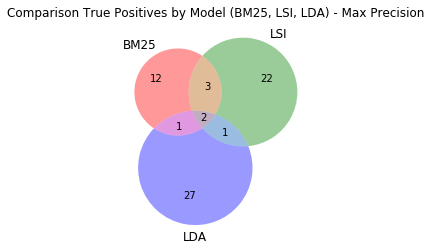

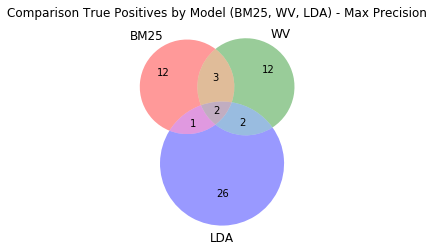

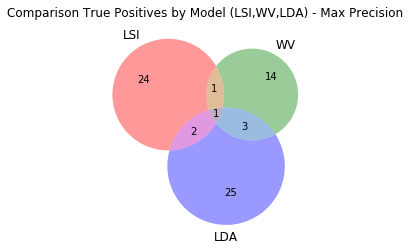

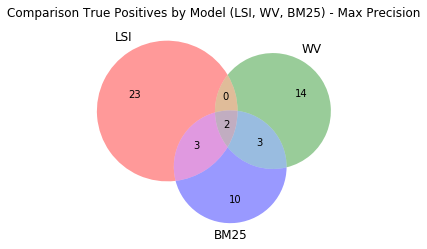

In [9]:
group = evals_df_4.groupby('model').perc_precision.max()
print(group)
print()

bm25_max_prec = group[group.index == 'bm25'].values[0]
lsi_max_prec = group[group.index == 'lsi'].values[0]
lda_max_prec = group[group.index == 'lda'].values[0]
wv_max_prec = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_max_prec))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_max_prec))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_max_prec))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_max_prec))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Max Precision')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Max Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI,WV,LDA) - Max Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Max Precision')
plt.show()

##### Exclusive Cases

In [10]:
print("BM25 Exclusive TP:")
display(bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLSI Exclusive TP:")
display(lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLDA Exclusive TP:")
display(lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set)

print("\n\nWV Exclusive TP:")
display(wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set)

BM25 Exclusive TP:


{('TC_159_TRG', 'BR_1432915_SRC'),
 ('TC_163_TRG', 'BR_1292573_SRC'),
 ('TC_179_TRG', 'BR_1316126_SRC'),
 ('TC_17_TRG', 'BR_1408361_SRC'),
 ('TC_193_TRG', 'BR_1296861_SRC'),
 ('TC_193_TRG', 'BR_1345687_SRC'),
 ('TC_206_TRG', 'BR_1305195_SRC'),
 ('TC_59_TRG', 'BR_1318903_SRC'),
 ('TC_59_TRG', 'BR_1344446_SRC'),
 ('TC_63_TRG', 'BR_1248268_SRC')}



LSI Exclusive TP:


{('TC_13_TRG', 'BR_1339497_SRC'),
 ('TC_154_TRG', 'BR_1287384_SRC'),
 ('TC_15_TRG', 'BR_1301421_SRC'),
 ('TC_15_TRG', 'BR_1328913_SRC'),
 ('TC_160_TRG', 'BR_1297686_SRC'),
 ('TC_161_TRG', 'BR_1432915_SRC'),
 ('TC_169_TRG', 'BR_1292566_SRC'),
 ('TC_169_TRG', 'BR_1292573_SRC'),
 ('TC_16_TRG', 'BR_1264988_SRC'),
 ('TC_16_TRG', 'BR_1294887_SRC'),
 ('TC_16_TRG', 'BR_1311998_SRC'),
 ('TC_180_TRG', 'BR_1296322_SRC'),
 ('TC_180_TRG', 'BR_1345687_SRC'),
 ('TC_184_TRG', 'BR_1296861_SRC'),
 ('TC_18_TRG', 'BR_1357458_SRC'),
 ('TC_198_TRG', 'BR_1365887_SRC'),
 ('TC_205_TRG', 'BR_1305195_SRC'),
 ('TC_22_TRG', 'BR_1451475_SRC'),
 ('TC_24_TRG', 'BR_1297976_SRC'),
 ('TC_60_TRG', 'BR_1318903_SRC'),
 ('TC_77_TRG', 'BR_1248267_SRC'),
 ('TC_79_TRG', 'BR_1270983_SRC')}



LDA Exclusive TP:


{('TC_13_TRG', 'BR_1297374_SRC'),
 ('TC_151_TRG', 'BR_1316126_SRC'),
 ('TC_152_TRG', 'BR_1316126_SRC'),
 ('TC_159_TRG', 'BR_1292573_SRC'),
 ('TC_159_TRG', 'BR_1357458_SRC'),
 ('TC_169_TRG', 'BR_1287748_SRC'),
 ('TC_19_TRG', 'BR_1451475_SRC'),
 ('TC_202_TRG', 'BR_1305195_SRC'),
 ('TC_24_TRG', 'BR_1278388_SRC'),
 ('TC_24_TRG', 'BR_1291770_SRC'),
 ('TC_24_TRG', 'BR_1297336_SRC'),
 ('TC_24_TRG', 'BR_1334844_SRC'),
 ('TC_24_TRG', 'BR_1335992_SRC'),
 ('TC_24_TRG', 'BR_1357458_SRC'),
 ('TC_24_TRG', 'BR_1365887_SRC'),
 ('TC_24_TRG', 'BR_1408361_SRC'),
 ('TC_24_TRG', 'BR_1451475_SRC'),
 ('TC_61_TRG', 'BR_1336227_SRC'),
 ('TC_61_TRG', 'BR_1353831_SRC'),
 ('TC_80_TRG', 'BR_1270983_SRC'),
 ('TC_88_TRG', 'BR_1270983_SRC'),
 ('TC_88_TRG', 'BR_1365887_SRC'),
 ('TC_89_TRG', 'BR_1306639_SRC'),
 ('TC_89_TRG', 'BR_1365887_SRC'),
 ('TC_99_TRG', 'BR_1299458_SRC')}



WV Exclusive TP:


{('TC_109_TRG', 'BR_1300738_SRC'),
 ('TC_135_TRG', 'BR_1314643_SRC'),
 ('TC_14_TRG', 'BR_1301421_SRC'),
 ('TC_14_TRG', 'BR_1335992_SRC'),
 ('TC_14_TRG', 'BR_1352539_SRC'),
 ('TC_172_TRG', 'BR_1295502_SRC'),
 ('TC_193_TRG', 'BR_1290424_SRC'),
 ('TC_38_TRG', 'BR_1295502_SRC'),
 ('TC_76_TRG', 'BR_1248267_SRC'),
 ('TC_79_TRG', 'BR_1306639_SRC'),
 ('TC_93_TRG', 'BR_1248267_SRC'),
 ('TC_94_TRG', 'BR_1306639_SRC')}

In [11]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 28
LDA TP Amount: 31
BM25 TP Amount: 18
WV TP Amount: 19


#### Max Recall

model
bm25           9.54
lda            5.55
lsi           14.42
wordvector     3.22
Name: perc_recall, dtype: float64



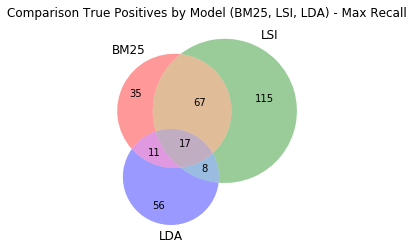

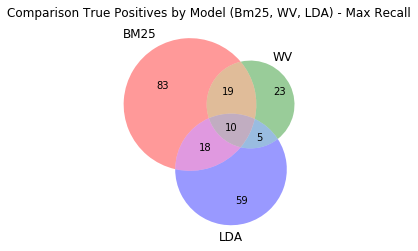

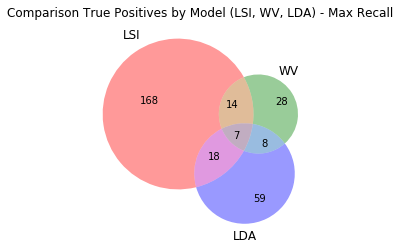

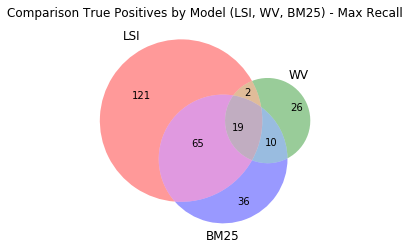

In [12]:
group = evals_df_4.groupby('model').perc_recall.max()
print(group)
print()

bm25_max_recall = group[group.index == 'bm25'].values[0]
lsi_max_recall = group[group.index == 'lsi'].values[0]
lda_max_recall = group[group.index == 'lda'].values[0]
wv_max_recall = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_max_recall))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_max_recall))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_max_recall))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_max_recall))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Max Recall')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (Bm25, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Max Recall')
plt.show()

##### Exclusive Cases

In [13]:
print("BM25 Exclusive TP:")
display(bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLSI Exclusive TP:")
display(lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLDA Exclusive TP:")
display(lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set)

print("\n\nWV Exclusive TP:")
display(wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set)

BM25 Exclusive TP:


{('TC_149_TRG', 'BR_1365887_SRC'),
 ('TC_14_TRG', 'BR_1337682_SRC'),
 ('TC_157_TRG', 'BR_1432915_SRC'),
 ('TC_161_TRG', 'BR_1292573_SRC'),
 ('TC_163_TRG', 'BR_1287384_SRC'),
 ('TC_163_TRG', 'BR_1432915_SRC'),
 ('TC_166_TRG', 'BR_1292566_SRC'),
 ('TC_167_TRG', 'BR_1287384_SRC'),
 ('TC_176_TRG', 'BR_1316126_SRC'),
 ('TC_177_TRG', 'BR_1316126_SRC'),
 ('TC_179_TRG', 'BR_1316126_SRC'),
 ('TC_180_TRG', 'BR_1430603_SRC'),
 ('TC_181_TRG', 'BR_1290424_SRC'),
 ('TC_183_TRG', 'BR_1430603_SRC'),
 ('TC_189_TRG', 'BR_1345687_SRC'),
 ('TC_20_TRG', 'BR_1293308_SRC'),
 ('TC_59_TRG', 'BR_1248268_SRC'),
 ('TC_59_TRG', 'BR_1336227_SRC'),
 ('TC_59_TRG', 'BR_1344446_SRC'),
 ('TC_59_TRG', 'BR_1353831_SRC'),
 ('TC_61_TRG', 'BR_1248268_SRC'),
 ('TC_61_TRG', 'BR_1449700_SRC'),
 ('TC_63_TRG', 'BR_1451475_SRC'),
 ('TC_95_TRG', 'BR_1365887_SRC'),
 ('TC_97_TRG', 'BR_1299458_SRC'),
 ('TC_98_TRG', 'BR_1289240_SRC'),
 ('TC_98_TRG', 'BR_1299458_SRC'),
 ('TC_98_TRG', 'BR_1306639_SRC'),
 ('TC_98_TRG', 'BR_1365887_SRC')}



LSI Exclusive TP:


{('TC_122_TRG', 'BR_1295502_SRC'),
 ('TC_13_TRG', 'BR_1264988_SRC'),
 ('TC_13_TRG', 'BR_1278388_SRC'),
 ('TC_13_TRG', 'BR_1294733_SRC'),
 ('TC_13_TRG', 'BR_1294887_SRC'),
 ('TC_13_TRG', 'BR_1296366_SRC'),
 ('TC_13_TRG', 'BR_1301421_SRC'),
 ('TC_13_TRG', 'BR_1311998_SRC'),
 ('TC_13_TRG', 'BR_1339497_SRC'),
 ('TC_13_TRG', 'BR_1353831_SRC'),
 ('TC_13_TRG', 'BR_1357458_SRC'),
 ('TC_13_TRG', 'BR_1451475_SRC'),
 ('TC_144_TRG', 'BR_1365887_SRC'),
 ('TC_147_TRG', 'BR_1365887_SRC'),
 ('TC_148_TRG', 'BR_1365887_SRC'),
 ('TC_149_TRG', 'BR_1305195_SRC'),
 ('TC_14_TRG', 'BR_1293308_SRC'),
 ('TC_14_TRG', 'BR_1311998_SRC'),
 ('TC_14_TRG', 'BR_1339497_SRC'),
 ('TC_14_TRG', 'BR_1357458_SRC'),
 ('TC_14_TRG', 'BR_1408361_SRC'),
 ('TC_150_TRG', 'BR_1365887_SRC'),
 ('TC_151_TRG', 'BR_1365887_SRC'),
 ('TC_152_TRG', 'BR_1305195_SRC'),
 ('TC_153_TRG', 'BR_1297686_SRC'),
 ('TC_154_TRG', 'BR_1287384_SRC'),
 ('TC_155_TRG', 'BR_1292566_SRC'),
 ('TC_156_TRG', 'BR_1292566_SRC'),
 ('TC_156_TRG', 'BR_1292573_SRC'),
 



LDA Exclusive TP:


{('TC_147_TRG', 'BR_1316126_SRC'),
 ('TC_14_TRG', 'BR_1278388_SRC'),
 ('TC_14_TRG', 'BR_1297336_SRC'),
 ('TC_14_TRG', 'BR_1305737_SRC'),
 ('TC_14_TRG', 'BR_1365887_SRC'),
 ('TC_151_TRG', 'BR_1316126_SRC'),
 ('TC_152_TRG', 'BR_1316126_SRC'),
 ('TC_156_TRG', 'BR_1287748_SRC'),
 ('TC_159_TRG', 'BR_1287748_SRC'),
 ('TC_159_TRG', 'BR_1292573_SRC'),
 ('TC_159_TRG', 'BR_1357458_SRC'),
 ('TC_164_TRG', 'BR_1287748_SRC'),
 ('TC_169_TRG', 'BR_1287748_SRC'),
 ('TC_16_TRG', 'BR_1278388_SRC'),
 ('TC_16_TRG', 'BR_1297336_SRC'),
 ('TC_16_TRG', 'BR_1305737_SRC'),
 ('TC_16_TRG', 'BR_1334844_SRC'),
 ('TC_17_TRG', 'BR_1297336_SRC'),
 ('TC_17_TRG', 'BR_1334844_SRC'),
 ('TC_187_TRG', 'BR_1335538_SRC'),
 ('TC_188_TRG', 'BR_1335538_SRC'),
 ('TC_19_TRG', 'BR_1278388_SRC'),
 ('TC_19_TRG', 'BR_1451475_SRC'),
 ('TC_201_TRG', 'BR_1305195_SRC'),
 ('TC_202_TRG', 'BR_1305195_SRC'),
 ('TC_24_TRG', 'BR_1264988_SRC'),
 ('TC_24_TRG', 'BR_1278388_SRC'),
 ('TC_24_TRG', 'BR_1291770_SRC'),
 ('TC_24_TRG', 'BR_1294733_SRC'),
 



WV Exclusive TP:


{('TC_131_TRG', 'BR_1314643_SRC'),
 ('TC_135_TRG', 'BR_1314643_SRC'),
 ('TC_13_TRG', 'BR_1328913_SRC'),
 ('TC_14_TRG', 'BR_1279864_SRC'),
 ('TC_160_TRG', 'BR_1287384_SRC'),
 ('TC_172_TRG', 'BR_1295502_SRC'),
 ('TC_174_TRG', 'BR_1295502_SRC'),
 ('TC_175_TRG', 'BR_1295502_SRC'),
 ('TC_180_TRG', 'BR_1290424_SRC'),
 ('TC_181_TRG', 'BR_1430603_SRC'),
 ('TC_188_TRG', 'BR_1290424_SRC'),
 ('TC_37_TRG', 'BR_1295502_SRC'),
 ('TC_39_TRG', 'BR_1295502_SRC'),
 ('TC_79_TRG', 'BR_1306639_SRC'),
 ('TC_80_TRG', 'BR_1306639_SRC'),
 ('TC_82_TRG', 'BR_1248267_SRC'),
 ('TC_83_TRG', 'BR_1248267_SRC'),
 ('TC_89_TRG', 'BR_1248267_SRC'),
 ('TC_90_TRG', 'BR_1248267_SRC'),
 ('TC_93_TRG', 'BR_1299458_SRC'),
 ('TC_94_TRG', 'BR_1299458_SRC'),
 ('TC_94_TRG', 'BR_1365887_SRC')}

In [14]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 207
LDA TP Amount: 92
BM25 TP Amount: 130
WV TP Amount: 57
